# 中国大学排名定向爬虫

In [5]:
import requests
import bs4
from bs4 import BeautifulSoup

In [76]:
def getHTMLText(url):
    try:
        r = requests.get(url, timeout = 30)
        r.raise_for_status
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return "Request error!"

def fillUnivList(ulist, html):
    soup = BeautifulSoup(html, "html.parser")
    for tr in soup.find('tbody').children:
        if isinstance(tr, bs4.element.Tag):
            tds = tr('td')
            ulist.append([tds[0].string, tds[1].string, tds[3].string])

# def printUnivList(ulist, num):
#     print("{:^8}\t{:^15}\t{:^10}".format('排名', '学校', '分数'))
#     for i in range(num):
#         u = ulist[i]
#         print("{:^8}\t{:^15}\t{:^10}".format(u[0], u[1], u[2]))

def printUnivList(ulist, num):
    tplt = "{0:^10}\t{1:{3}^10}\t{2:^10}"
    print(tplt.format('排名', '学校', '分数', chr(12288)))
    for i in range(num):
        u = ulist[i]
        print(tplt.format(u[0], u[1], u[2], chr(12288)))
    
def main(k):
    uinfo = []
    url = "http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html"
    html = getHTMLText(url)
    fillUnivList(uinfo, html)
    printUnivList(uinfo, k) # k univs


In [77]:
main(100)

    排名    	　　　　学校　　　　	    分数    
    1     	　　　清华大学　　　	   94.6   
    2     	　　　北京大学　　　	   76.5   
    3     	　　　浙江大学　　　	   72.9   
    4     	　　上海交通大学　　	   72.1   
    5     	　　　复旦大学　　　	   65.6   
    6     	　中国科学技术大学　	   60.9   
    7     	　　华中科技大学　　	   58.9   
    7     	　　　南京大学　　　	   58.9   
    9     	　　　中山大学　　　	   58.2   
    10    	　哈尔滨工业大学　　	   56.7   
    11    	　北京航空航天大学　	   56.3   
    12    	　　　武汉大学　　　	   56.2   
    13    	　　　同济大学　　　	   55.7   
    14    	　　西安交通大学　　	   55.0   
    15    	　　　四川大学　　　	   54.4   
    16    	　　北京理工大学　　	   54.0   
    17    	　　　东南大学　　　	   53.6   
    18    	　　　南开大学　　　	   52.8   
    19    	　　　天津大学　　　	   52.3   
    20    	　　华南理工大学　　	   52.0   
    21    	　　　中南大学　　　	   50.3   
    22    	　　北京师范大学　　	   49.7   
    23    	　　　山东大学　　　	   49.1   
    23    	　　　厦门大学　　　	   49.1   
    25    	　　　吉林大学　　　	   48.9   
    26    	　　大连理工大学　　	   48.6   
    27    	　　电子科技大学　　	   48.4   
    28    	　　　湖南大学　　　	   48.1   
    29    	　　　苏州大学　　　	   47.3   
    30    

In [96]:
# 自己第二遍写的
import requests
import bs4

def getHTMLText(url):
    try:
        r = requests.get(url)
        r.raise_for_status
        r.encoding = r.apparent_encoding
        return r.text
    except:
        print('Request error!')

def fillUnivList(res, demo):
    soup = bs4.BeautifulSoup(demo, "html.parser")
    tbody = soup.tbody
    for tr in tbody.children:
        if isinstance(tr, bs4.element.Tag):
            td = tr.find_all('td')
            res.append([td[0].string, td[1].string, td[2].string, td[3].string, td[4].string])

def printUnivList(res, num):
    plt = "{0:{5}<4}\t{1:{5}<11}\t{2:{5}<6}\t{3:{5}<6}\t{4:{5}<6}"
    print(plt.format('排名', '学校', '省份', '分数', '生源', chr(12288)))
    for i in range(num):
        print(plt.format(res[i][0], res[i][1], res[i][2], res[i][3], res[i][4], chr(12288)))    
    
def main(k):
    res = []
    url = "http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html"
    demo = getHTMLText(url)
    fillUnivList(res, demo) #list随动
    printUnivList(res, k)

In [97]:
main(50)

排名　　	学校　　　　　　　　　	省份　　　　	分数　　　　	生源　　　　
1　　　	清华大学　　　　　　　	北京　　　　	94.6　　	100.0　
2　　　	北京大学　　　　　　　	北京　　　　	76.5　　	95.2　　
3　　　	浙江大学　　　　　　　	浙江　　　　	72.9　　	84.2　　
4　　　	上海交通大学　　　　　	上海　　　　	72.1　　	91.1　　
5　　　	复旦大学　　　　　　　	上海　　　　	65.6　　	91.6　　
6　　　	中国科学技术大学　　　	安徽　　　　	60.9　　	91.1　　
7　　　	华中科技大学　　　　　	湖北　　　　	58.9　　	80.1　　
7　　　	南京大学　　　　　　　	江苏　　　　	58.9　　	86.2　　
9　　　	中山大学　　　　　　　	广东　　　　	58.2　　	79.7　　
10　　	哈尔滨工业大学　　　　	黑龙江　　　	56.7　　	76.6　　
11　　	北京航空航天大学　　　	北京　　　　	56.3　　	86.9　　
12　　	武汉大学　　　　　　　	湖北　　　　	56.2　　	82.4　　
13　　	同济大学　　　　　　　	上海　　　　	55.7　　	85.2　　
14　　	西安交通大学　　　　　	陕西　　　　	55.0　　	82.0　　
15　　	四川大学　　　　　　　	四川　　　　	54.4　　	74.0　　
16　　	北京理工大学　　　　　	北京　　　　	54.0　　	79.7　　
17　　	东南大学　　　　　　　	江苏　　　　	53.6　　	79.4　　
18　　	南开大学　　　　　　　	天津　　　　	52.8　　	83.9　　
19　　	天津大学　　　　　　　	天津　　　　	52.3　　	80.1　　
20　　	华南理工大学　　　　　	广东　　　　	52.0　　	73.4　　
21　　	中南大学　　　　　　　	湖南　　　　	50.3　　	73.2　　
22　　	北京师范大学　　　　　	北京　　　　	49.7　　	82.7　　
23　　	山东大学　　　　　　　	山东　　　　	49.1　　	71.3　　
23　　	厦门大学　　　　　　　	福建　　　　	49.1　　	75.3　　
25　　	吉林大学　　　　　　　	吉林　　　　	48.9　　	71.9　　
26　　	大连理工大学　

# 重点复习：

(1)
1. demo
2. soup = bs4.BeautifulSoup(demo, "html.parser")
3. soup = BeautifulSoup(demo, "html.parser")

(2)
1. tbody = soup.tbody
2. tbody = soup.find('tbody')

(3)
1. if isinstance(tr, bs4.element.Tag):

(4)
1. td = tr.find_all('td')
2. td = tr('td')

(5)
1. print('{:^10}\t...'.format(...))
2. td[i].string
3. fillUnivList(res, demo), res随动, 不用return

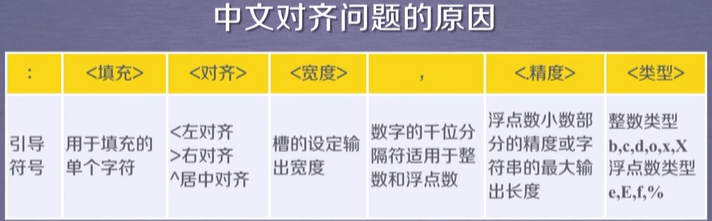